In [9]:
import sys
sys.path.insert(0, "venv\\Lib\\site-packages")

from CarmaxBrowser import CarmaxBrowser
from CarmaxAPI import CarmaxAPI

import numpy as np
import pandas as pd
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [24]:
class model_prediciton:
    
    def __init__(self, carmax_query='/cars?search=civic'):
        self.carmax_query = carmax_query
                 
        browser = CarmaxBrowser()
        api = CarmaxAPI(browser)
        self.records = api.search_model_headless_all(search=carmax_query, zip_code=15206)
        browser.close_browser()
    
    def fit(self):

        interested_col = ['year', 'make', 'model', 'trim', 'msrp', 'mileage', 'basePrice', 'isNew', 'highlights']
        self.df = pd.DataFrame(self.records, columns=[i for i in interested_col])

        self.scaler = MinMaxScaler()
        x_scaled = self.scaler.fit_transform([i for i in zip(self.df['year'], self.df['mileage'])])
        y_ = self.df['basePrice']

        self.model = LinearRegression().fit(x_scaled, y_)
        #  model.score(x_scaled, y_)
        return self
    
    def predict(self, year, mileage):
        return self.model.predict( 
            self.scaler.transform( np.array([[year, mileage]]) )
        )

In [53]:
m = model_prediciton('/cars?search=Toyota%20Highlander').fit()

In [67]:
m.df

,year,make,model,trim,msrp,mileage,basePrice,isNew,highlights
0,2015,Toyota,Highlander,LE PLUS,32200.0,49550,23998.0,False,[singleOwner]
1,2016,Toyota,Highlander,XLE,38100.0,30997,27998.0,False,"[singleOwner, allNewTires, warranty]"
2,2016,Toyota,Highlander,LE,33000.0,21264,25998.0,False,"[singleOwner, lowMilesPerYear, warranty]"
3,2016,Toyota,Highlander,XLE,38100.0,24581,29998.0,False,"[singleOwner, lowMilesPerYear, warranty]"
4,2015,Toyota,Highlander,XLE,37700.0,66502,24998.0,False,[singleOwner]
5,2016,Toyota,Highlander,XLE,38100.0,33260,28998.0,False,"[singleOwner, warranty]"
6,2016,Toyota,Highlander,LE PLUS,33000.0,10226,27998.0,False,"[singleOwner, lowMiles, warranty]"
7,2016,Toyota,Highlander,LE,33000.0,22752,26998.0,False,"[singleOwner, lowMilesPerYear, warranty]"
8,2016,Toyota,Highlander,LE PLUS,33000.0,29908,25998.0,False,"[singleOwner, warranty]"
9,2016,Toyota,Highlander,Limited,41900.0,18762,31998.0,False,"[singleOwner, allNewTires, lowMiles, warranty,..."


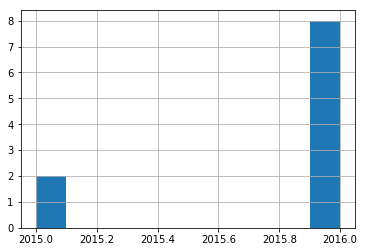

In [69]:
m.df['year'].hist()

In [55]:
m.model.coef_

array([3302.85608194, -738.85798567])

In [66]:
m.predict(2016, 50000) - m.fit().predict(2015, 65000)

array([3499.79384911])